<a href="https://colab.research.google.com/github/soham534/K-NearestNeighbour/blob/main/KNNBy_SohamBundela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Import the dataset

Link: https://raw.githubusercontent.com/omairaasim/machine_learning/master/project_11_k_nearest_neighbor/iphone_purchase_records.csv

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/omairaasim/machine_learning/master/project_11_k_nearest_neighbor/iphone_purchase_records.csv")

# EDA - Exploratory Data Analysis

In [ ]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
df.tail()

,Gender,Age,Salary,Purchase Iphone
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


In [ ]:
df.shape

(400, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
df.Gender.value_counts()

,count
Gender,
Female,204
Male,196


In [ ]:
# No. of Iphones Purchased w.r.t. Gender
(df['Gender'][df['Purchase Iphone']==1]).value_counts()

,count
Gender,
Female,77
Male,66


In [ ]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


# Spliting of Data

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Lable Encoading

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()

In [ ]:
x.Gender = enc.fit_transform(x.Gender)

In [ ]:
x

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  400 non-null    int64
 1   Age     400 non-null    int64
 2   Salary  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


# Spliting the Data into Sets

In [ ]:
skf = StratifiedKFold(n_splits=5)

In [ ]:
for train_index,test_index in skf.split(x,y):
  x_train, x_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Feature Scaling

In [ ]:
scale = StandardScaler()

In [ ]:
x_train

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
354,1,36,99000
355,1,60,34000
356,1,54,70000
358,1,40,71000


In [ ]:
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

# Model Selection

In [ ]:
log = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)

# Training the Model

In [ ]:
log.fit(x_train,y_train)
knn.fit(x_train,y_train)

KNeighborsClassifier()

# Testing the Model

In [ ]:
y_knn_pred = knn.predict(x_test)

In [ ]:
newdf = pd.DataFrame({'Actual':y_test,'Predicted':y_knn_pred})

In [ ]:
sns.

<Axes: >

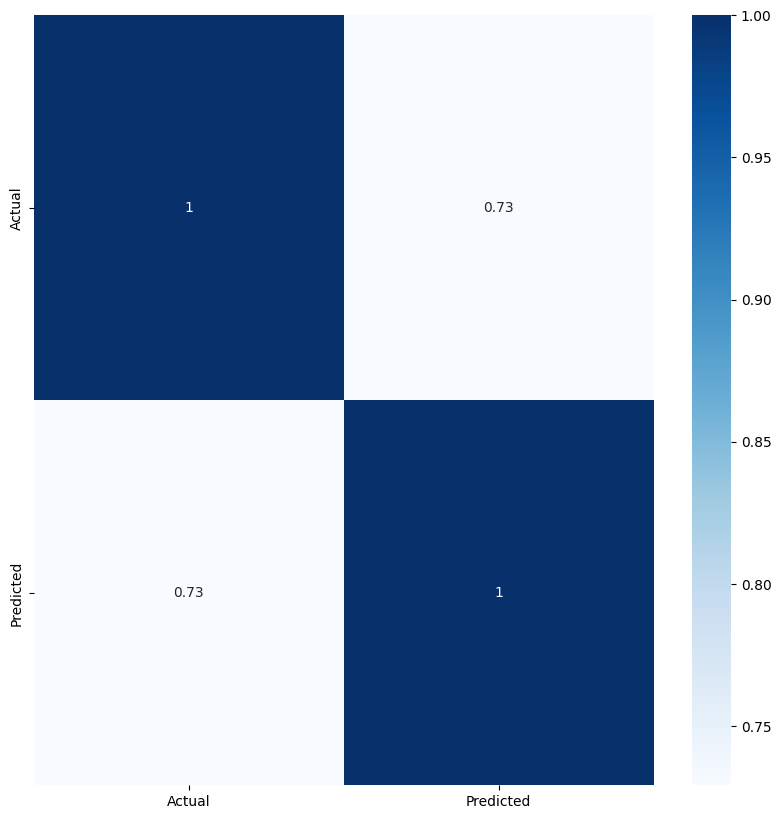

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(newdf.corr(),annot=True,cmap="Blues")

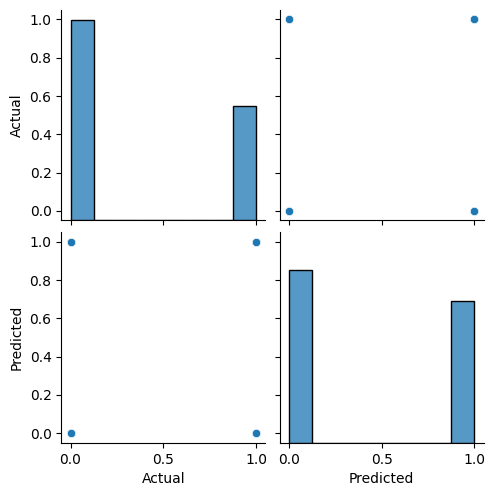

In [ ]:
sns.pairplot(newdf)

In [ ]:
newdf.head()

,Actual,Predicted
266,0,0
267,0,0
269,0,0
270,0,1
276,0,1


In [ ]:
confusion_matrix(y_test,y_knn_pred)

array([[42,  9],
       [ 2, 27]])

In [ ]:
# Accuracy = (46+22)/80 = 86%

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
lis = [i for i in range(2,101) if i%2!=0]

In [ ]:
acc=[]
dic = {}
for i in lis:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  y_knn_pred = knn.predict(x_test)
  acc.append(accuracy_score(y_test,y_knn_pred))
  dic[i] = accuracy_score(y_test,y_knn_pred)

print(max(acc))
# 0.7625 = 76%
# 0.95 = 0.95%

0.95


In [ ]:
dic

{3: 0.8125,
 5: 0.8625,
 7: 0.9,
 9: 0.9375,
 11: 0.9375,
 13: 0.95,
 15: 0.95,
 17: 0.925,
 19: 0.9125,
 21: 0.85,
 23: 0.8,
 25: 0.8,
 27: 0.7875,
 29: 0.8,
 31: 0.8,
 33: 0.7625,
 35: 0.75,
 37: 0.7625,
 39: 0.75,
 41: 0.75,
 43: 0.75,
 45: 0.75,
 47: 0.7375,
 49: 0.7375,
 51: 0.7375,
 53: 0.7375,
 55: 0.7375,
 57: 0.7375,
 59: 0.7375,
 61: 0.7375,
 63: 0.7375,
 65: 0.725,
 67: 0.725,
 69: 0.725,
 71: 0.725,
 73: 0.7125,
 75: 0.7125,
 77: 0.725,
 79: 0.725,
 81: 0.725,
 83: 0.725,
 85: 0.725,
 87: 0.725,
 89: 0.725,
 91: 0.7,
 93: 0.7,
 95: 0.7,
 97: 0.6875,
 99: 0.6875}